# Predicted IMF and pH of lamb loin samples.


In this notebook the Intra-Muscular Fat (IMF) percentage and pH are presented for each lamb loin sample. The IMF and pH are predicted using the NIR spectrum of each sample based on 2014,'15,'16 lamb data.   

The pH and IMF% are shown for each loin sample. When the cell is running the code is interactive; hover your cursor over the data points to show more information. 'ID' is the tag number on the sample barcode, and 'pH' / 'IMF' are the predicted values. The display will also show nearby data points if the IMF/pH value is similar.

To begin, execute the cell below by selecting the cell and clicking 'run' at the top of the notebook. The first cell in an notebook usually sets up the python script for the remaining cells. In the cell below I create two functions which are called later to display the data information. Once this cell is run once you can move on to the nest section. 


In [15]:
## This cell sets up the interactive plots for the notebook

import numpy as np
import matplotlib.pylab as plt


## update the annotation to with the Tag ID, pH and IMF.
def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos

    print(pos)
    text = " ID:   {}\n IMF: {}\n pH:  {}".format("  ".join([str(names[n]) for n in ind["ind"]])," ".join(list(map(str,IMF[ind["ind"]])))," ".join(list(map(str,pH[ind["ind"]]))), )
    annot.set_text(text)
    annot.get_bbox_patch().xy = (40,4)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.5)

    
## update the annotation when hovering the cursor over the data point.
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
                

### IMF distribution 

In the cell below the predicted IMF percentage and pH of each sample is shown. The color of each data point shows the pH and the y-axis gives the IMF%. To execute the cell below, select the cell and click 'run' at the top of the notebook.

You can increase the size of the figure by dragging the lower right-hand corner. 


<IPython.core.display.Javascript object>


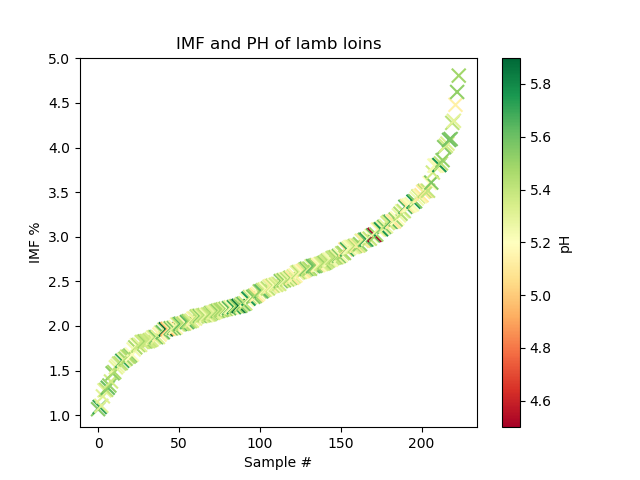

In [16]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'


### Load the data 
data = np.genfromtxt('BLG2018NIRb_180321Invermay.csv', dtype=None, delimiter=',', names=True)
data.sort(order = 'IMF')

ID = data['ID']
IMF = np.around(data['IMF'],4)
pH = np.around(data['pH'],4)
names = ID
cmap = plt.cm.RdYlGn
c = pH
norm = plt.Normalize(4.5,5.9)

x = np.arange(0, len(ID))
fig,ax = plt.subplots()
plt.title('IMF and PH of lamb loins')
plt.ylabel('IMF %')
plt.xlabel('Sample #')
sc = plt.scatter(x,IMF,c=c, s=100, cmap=cmap, norm=norm, marker = 'x')
cbar = plt.colorbar(sc)
cbar.set_label('pH')
annot = ax.annotate("", xy=(0,0), xytext=(0,4),
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()


## pH distribution

In the cell below the pH distribution is shown on the y-axis and the IMF is given by the color. Don't forget to 'run' the cell to make the plot interactive. Only one cell can be running at a time, so when the cell below is executed the cell above will become static

<IPython.core.display.Javascript object>


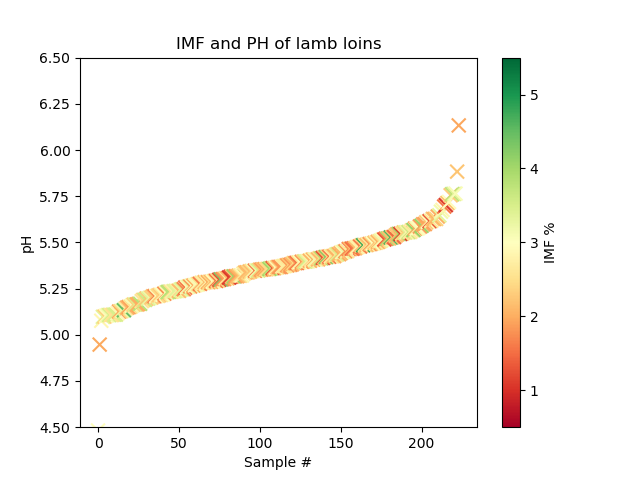

In [10]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

data.sort(order = 'pH')

ID = data['ID']
IMF = np.around(data['IMF'],3)
pH = np.around(data['pH'],3)
names = ID
cmap = plt.cm.RdYlGn
c = IMF
norm = plt.Normalize(0.5,5.5)
x = np.arange(0, len(ID))
fig,ax = plt.subplots()
plt.title('IMF and PH of lamb loins')
plt.ylabel('pH')
plt.xlabel('Sample #')
sc = plt.scatter(x,pH,c=c, s=100, cmap=cmap, norm=norm, marker = 'x')
plt.ylim(4.5,6.5)
cbar = plt.colorbar(sc)
cbar.set_label('IMF %')
annot = ax.annotate("", xy=(0,0), xytext=(0,5.75),
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"),horizontalalignment='left')
annot.set_visible(False)

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()